# Project: Wrangling and Analyze Data

## Data Gathering
In this project, three different files relating to dog rating are gathered from different sources. Their dataframes will be named df1, df2, and df3, respectively. 

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [580]:
#Importing all the libraries required for this project

import pandas as pd
import numpy as np
import os
import json
import tweepy
import requests
import re

In [581]:
#reading the first file into a dataframe called "df1"
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [582]:
#looking at the df1 to confirm it is properly imported
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [583]:
#creating a folder for the image prediction data on my local machine
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [584]:
#creating a request using the provided Url
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [585]:
#checking if the request is successful
response

<Response [200]>

In [586]:
#looking at the content of the image prediction data
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [587]:
#writing the data into a file in the newly created folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [588]:
#reading the second file into a dataframe called "df2"
df2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [589]:
#looking at the df2 to confirm if it is properly imported
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [590]:
#the latest version of tweepy which I installed earlier was not working to query the API
# so, I had to install this lower version to be able to use the tweeepy library
#pip install tweepy==3.10.0

In [591]:
#using the personalised four keys to access the Twitter API
access_token = '########'
access_token_secret = '########'
api_key = '########'
api_key_secret = '########'

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [592]:
#creating a list of twitter_id from df1 
list_tweet_id = df1.tweet_id

In [593]:
#looking at a random tweet to see the available information 
#(the number "5" could be changed at anytime to see any tweet information)
random_tweet = api.get_status(list_tweet_id[5])
random_tweet

{'created_at': 'Sat Jul 29 00:08:17 +0000 2017',
 'id': 891087950875897856,
 'id_str': '891087950875897856',
 'text': "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG:… https://t.co/xx5cilW0Dd",
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/xx5cilW0Dd',
    'expanded_url': 'https://twitter.com/i/web/status/891087950875897856',
    'display_url': 'twitter.com/i/web/status/8…',
    'indices': [116, 139]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name': 'WeRateDogs®',
  'screen_name': 'dog_rates',
  'location': 'all our links ➜',
  'description': 'Your Only Source For Prof

After seeing the information entails in each's tweet, I am interested in getting the retweet count and favorites (likes) of each tweet

In [594]:
#getting the retweet counts and favorites by iterating over the twitter ids
df_twitter = []
exception_list = [] #storing the deleted tweets here
for twitter_id in list_tweet_id:
    try:
        page = api.get_status(twitter_id, tweet_mode = 'extended')
        retweet_count = page['retweet_count']
        favorites = page['favorite_count']
        df_twitter.append({'tweet_id': twitter_id, 'retweet_count': retweet_count, 'favorites': favorites})
        print (twitter_id, retweet_count, favorites)
    except Exception as e:
        exception_list.append(twitter_id)

892420643555336193 6982 33721
892177421306343426 5284 29253
891815181378084864 3469 21989
891689557279858688 7197 36811
891327558926688256 7730 35192
891087950875897856 2590 17746
890971913173991426 1651 10336
890729181411237888 15707 56668
890609185150312448 3608 24449
890240255349198849 6085 27867
890006608113172480 6129 26968
889880896479866881 4149 24506
889665388333682689 8321 41920
889638837579907072 3705 23588
889531135344209921 1876 13313
889278841981685760 4430 22033
888917238123831296 3753 25543
888804989199671297 3519 22396
888554962724278272 2870 17267
888078434458587136 2888 19103
887705289381826560 4524 26543
887517139158093824 9826 40609
887473957103951883 14984 60021
887343217045368832 8794 29498
887101392804085760 4976 26905
886983233522544640 6295 30285
886736880519319552 2621 10475
886680336477933568 3726 19677
886366144734445568 2618 18509
886267009285017600 4 105
886258384151887873 5266 24458
886054160059072513 93 0
885984800019947520 5596 28526
885528943205470208 

837482249356513284 407 3602
837471256429613056 2061 11968
837110210464448512 2177 15059
836989968035819520 2111 11935
836753516572119041 4262 18101
836677758902222849 2021 11820
836648853927522308 508 0
836397794269200385 25057 0
836380477523124226 2745 13893
836260088725786625 3978 19928
836001077879255040 3889 17857
835685285446955009 7414 0
835574547218894849 3297 16631
835536468978302976 1541 0
835309094223372289 19145 0
835297930240217089 2738 15424
835264098648616962 1541 7228
835246439529840640 63 1988
835172783151792128 5290 24539
835152434251116546 2757 20913
834931633769889797 1490 10094
834786237630337024 5106 20182
834574053763584002 2313 12798
834477809192075265 9758 0
834458053273591808 1547 9019
834209720923721728 4323 19236
834167344700198914 3361 14810
834089966724603904 1962 9432
834086379323871233 2039 12222
833863086058651648 2210 12600
833826103416520705 3488 17055
833732339549220864 205 0
833722901757046785 2997 19649
833479644947025920 1888 13978
8331246945974435

800018252395122689 12281 26820
799774291445383169 4362 0
799757965289017345 2000 7950
799422933579902976 1798 7674
799308762079035393 5069 0
799297110730567681 2555 9373
799063482566066176 2339 7677
798933969379225600 4150 12396
798925684722855936 1357 7150
798705661114773508 6206 0
798701998996647937 7225 0
798697898615730177 6084 0
798694562394996736 4634 0
798686750113755136 2177 0
798682547630837760 4423 0
798673117451325440 5213 0
798665375516884993 3673 0
798644042770751489 1740 0
798628517273620480 1861 0
798585098161549313 5260 0
798576900688019456 5468 0
798340744599797760 3134 0
798209839306514432 2419 9910
797971864723324932 2886 10925
797545162159308800 4610 13840
797236660651966464 6151 18887
797165961484890113 24 212
796904159865868288 8341 0
796865951799083009 1826 7291
796759840936919040 2827 11194
796563435802726400 6718 0
796484825502875648 1649 7163
796387464403357696 3883 10438
796177847564038144 13338 0
796149749086875649 13338 30436
796125600683540480 1680 4728
79

761004547850530816 3208 10621
760893934457552897 887 3570
760656994973933572 1747 6158
760641137271070720 1188 4666
760539183865880579 3334 7063
760521673607086080 1281 3915
760290219849637889 10551 25015
760252756032651264 796 3698
760190180481531904 1648 5345
760153949710192640 28 0
759943073749200896 1928 5518
759846353224826880 1797 6278
759793422261743616 1759 5568
759557299618865152 1102 4387
759447681597108224 2271 7927
759446261539934208 454 1560
759197388317847553 1801 5688
759159934323924993 1065 0
759099523532779520 3814 13586
759047813560868866 1846 6055
758854675097526272 840 3317
758828659922702336 3545 10455
758740312047005698 1497 5372
758474966123810816 913 3550
758467244762497024 2025 4472
758405701903519748 1759 4861
758355060040593408 961 3148
758099635764359168 9132 17675
758041019896193024 339 2526
757741869644341248 3018 6412
757729163776290825 7193 0
757725642876129280 1108 4249
757611664640446465 1007 4284
757597904299253760 278 0
757596066325864448 956 4061
75

722974582966214656 1434 3758
722613351520608256 1493 4574
721503162398597120 1646 4224
721001180231503872 551 2340
720785406564900865 699 2854
720775346191278080 565 2251
720415127506415616 1359 3787
720389942216527872 2261 5864
720340705894408192 875 2620
720059472081784833 1019 3547
720043174954147842 1816 4568
719991154352222208 1593 4478
719704490224398336 1297 4175
719551379208073216 1710 4642
719367763014393856 688 2599
719339463458033665 1119 4090
719332531645071360 857 3179
718971898235854848 985 3206
718939241951195136 1583 4796
718631497683582976 7225 17320
718613305783398402 428 2256
718540630683709445 921 2250
718460005985447936 474 2501
718454725339934721 1378 4506
718246886998687744 446 1759
718234618122661888 912 3561
717841801130979328 543 2272
717790033953034240 988 2632
717537687239008257 1662 5308
717428917016076293 407 1476
717421804990701568 758 2889
717047459982213120 1737 5796
717009362452090881 868 2981
716802964044845056 1050 3957
716791146589110272 1458 7741
7

695446424020918272 1654 4086
695409464418041856 3241 7984
695314793360662529 1299 3333
695095422348574720 550 2452
695074328191332352 994 2610
695064344191721472 529 1477
695051054296211456 717 2430
694925794720792577 818 2492
694905863685980160 835 2531
694669722378485760 13069 33002
694356675654983680 251 1387
694352839993344000 541 1878
694342028726001664 432 1461
694329668942569472 449 1816
694206574471057408 1856 3814
694183373896572928 842 2707
694001791655137281 925 3139
693993230313091072 359 1731
693942351086120961 329 1622
693647888581312512 518 2476
693644216740769793 115 1268
693642232151285760 376 2349
693629975228977152 720 2261
693622659251335168 337 1418
693590843962331137 1779 4656
693582294167244802 223 1516
693486665285931008 566 1626
693280720173801472 1122 3083
693267061318012928 732 2199
693262851218264065 452 2042
693231807727280129 671 2655
693155686491000832 2893 7264
693109034023534592 550 1565
693095443459342336 405 1701
692919143163629568 697 2495
6929058627

679158373988876288 7229 19383
679148763231985668 922 2549
679132435750195208 1035 2702
679111216690831360 2309 5425
679062614270468097 7193 15464
679047485189439488 586 2056
679001094530465792 1094 2597
678991772295516161 1016 2068
678969228704284672 409 1498
678800283649069056 819 2355
678798276842360832 1028 3153
678774928607469569 820 2573
678767140346941444 1223 3217
678764513869611008 414 1478
678755239630127104 2923 6461
678740035362037760 1485 3386
678708137298427904 2182 5111
678675843183484930 1317 2598
678643457146150913 359 1874
678446151570427904 1373 3649
678424312106393600 2273 4990
678410210315247616 1609 3824
678399652199309312 28499 73282
678396796259975168 373 1446
678389028614488064 381 1711
678380236862578688 822 2233
678341075375947776 472 1568
678334497360859136 223 1181
678278586130948096 5488 10398
678255464182861824 328 1449
678023323247357953 341 1740
678021115718029313 5620 12351
677961670166224897 1522 3131
677918531514703872 364 1217
677895101218201600 1840

Rate limit reached. Sleeping for: 234


677269281705472000 634 1795
677228873407442944 1465 3206
677187300187611136 810 2484
676975532580409345 950 2524
676957860086095872 719 2022
676949632774234114 348 1186
676948236477857792 773 1956
676946864479084545 326 1575
676942428000112642 666 1870
676936541936185344 4423 11594
676916996760600576 1612 2691
676897532954456065 649 2053
676864501615042560 626 1889
676821958043033607 13755 20675
676819651066732545 602 1656
676811746707918848 379 1305
676776431406465024 1802 4517
676617503762681856 854 2618
676613908052996102 176 983
676606785097199616 386 1719
676603393314578432 340 1035
676593408224403456 1886 4127
676590572941893632 110 841
676588346097852417 700 2079
676582956622721024 251 1076
676575501977128964 988 2331
676533798876651520 489 1695
676496375194980353 471 1373
676470639084101634 4175 10567
676440007570247681 588 1560
676430933382295552 302 1262
676263575653122048 484 1894
676237365392908289 251 1091
676219687039057920 27697 70758
676215927814406144 516 1572
67619183

670782429121134593 656 1347
670780561024270336 249 701
670778058496974848 62 297
670764103623966721 371 956
670755717859713024 87 392
670733412878163972 446 848
670727704916926465 312 736
670717338665226240 417 1053
670704688707301377 318 686
670691627984359425 208 518
670679630144274432 241 663
670676092097810432 35 214
670668383499735048 4309 9446
670474236058800128 631 1335
670468609693655041 77 314
670465786746662913 467 854
670452855871037440 174 489
670449342516494336 568 1074
670444955656130560 1740 6051
670442337873600512 175 579
670435821946826752 436 938
670434127938719744 560 1255
670433248821026816 100 296
670428280563085312 520 1231
670427002554466305 141 461
670421925039075328 550 1143
670420569653809152 265 538
670417414769758208 280 501
670411370698022913 766 1790
670408998013820928 187 483
670403879788544000 128 377
670385711116361728 173 490
670374371102445568 238 668
670361874861563904 55 287
670338931251150849 96 373
670319130621435904 1065 3468
670303360680108032 1

In [595]:
#checking the number of tweets that were retrieved
len(df_twitter)

2327

In [596]:
#checking the deleted tweets - the ones in the exception list
exception_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 856330835276025856,
 851953902622658560,
 851861385021730816,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 766864461642756096,
 759923798737051648,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [597]:
#checking the number of deleted tweets
len(exception_list)

29

In [598]:
#creating a dataframe named df3 for the third data collected for this project
df3 = pd.DataFrame(df_twitter)
#visualising the df3 
df3.head()

,tweet_id,retweet_count,favorites
0,892420643555336193,6982,33721
1,892177421306343426,5284,29253
2,891815181378084864,3469,21989
3,891689557279858688,7197,36811
4,891327558926688256,7730,35192


In [599]:
#saving a copy of df3 to my local machine for visual assessment
df3.to_csv('jsonfile_tweet.csv', encoding='utf-8', index=False)

## Assessing Data
Both visual and programmatic assessment are conducted on the three datasets both in Excel and using pandas



### Visual Assessment

In [600]:
#visual assessment of the first data
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [601]:
#visual assessment of the second data
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [602]:
#visual assessment of the third data
df3

,tweet_id,retweet_count,favorites
0,892420643555336193,6982,33721
1,892177421306343426,5284,29253
2,891815181378084864,3469,21989
3,891689557279858688,7197,36811
4,891327558926688256,7730,35192
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Programmatic Visualization

In [603]:
#checking the columns with missing values and datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [604]:
#checking the summary statistics
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [605]:
#checking the unique names of the dogs
df1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [606]:
#checking for duplicates
df1.duplicated().sum()

0

In [607]:
#checking for the shape of the dataframe
df1.shape

(2356, 17)

In [608]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [609]:
#checking the columns with missing values and datatypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [610]:
#checking the summary statistics
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [611]:
#checking for duplicates
df2.duplicated().sum()

0

In [612]:
#checking for the shape of the dataframe
df2.shape

(2075, 12)

In [613]:
#checking the columns with missing values and datatypes
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2327 non-null   int64
 1   retweet_count  2327 non-null   int64
 2   favorites      2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [614]:
#checking the summary statistics
df3.describe()

,tweet_id,retweet_count,favorites
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2463.556081,7033.631285
std,6.820795e+16,4171.706282,10929.039629
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,493.500000,1221.000000
50%,7.178418e+17,1148.000000,3043.000000
75%,7.986547e+17,2850.500000,8572.000000
max,8.924206e+17,70490.000000,144426.000000


In [615]:
#checking for duplicates
df3.duplicated().sum()

0

In [616]:
#checking for the shape of the dataframe
df3.shape

(2327, 3)

### Quality issues

1. The three datasets do not have the same number of roles due to missing photos and maybe retweets

2. There are columns that consist of values other than "10" in the denominator.

3. There are unimaginable numbers in the rating numerator column.

4. There are 181 reweets and 78 replies in the datasets, which are not needed.

5. The names of some of the dogs are wrongly spelt.

6. The timestamp column contains unnecessary characters.

7. The datatypes of some of the columns are not appropriate.

8. There are three sources of the data, which are not clearly displayed.



### Tidiness issues
1. The three dataframes can be combined to form one neat dataframe

2. The various stages of dogs: doggo, pupper, puppo, and floof(er), represent only one information. Thus, we can have one column instead of the four columns for such information.

## Cleaning Data
In this section, clean **all** of the issues documented while assessing are addressed (i.e., cleaned). 



In [617]:
# Making copies of the original pieces of data for reference purpose
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1:

The three dataframes can be combined to form one master dataset, since all of the data are related to dog ratings. This conforms with the rule that a table should contain one obervational unit.

#### Define:

Using the merge method, merge the three dataframes together by joining them using tweet_id

#### Code

In [618]:
#merging df1_clean with df2_clean 
initial_df = pd.merge(df1_clean, df2_clean, on=['tweet_id'], how='left')

#creating the master dataframe that consists of the three differently sourced data
master_df = pd.merge(initial_df, df3_clean, on=['tweet_id'], how='left')

#### Test

In [619]:
#checking if the dataframes are correctly merged
initial_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [620]:
#checking the shape of the initial_df 
initial_df.shape

(2356, 28)

The shape shows that the dataframe is correctly merged

In [621]:
#checking if the master dataframes is correctly created
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6982.0,33721.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5284.0,29253.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3469.0,21989.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7197.0,36811.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7730.0,35192.0


In [622]:
#checking the shape of the master dataframe
master_df.shape

(2356, 30)

### Issue #2:

The various stages of dogs: doggo, pupper, puppo, and floofer, represent only one information. Thus, we can have one column instead of the four columns for such information.

#### Define

Use the melt function to transform the four columns into one.

#### Code

In [623]:
#creating a list of columns for use in the melting task
master_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorites'],
      dtype='object')

In [624]:
#melting the four columns
master_df1 = pd.melt(master_df, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name','jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorites'], var_name = 'dog' , value_name = 'dog_types' )
# the var_name need to be dropped after melting

In [625]:
#checking if the melting was done successfully
master_df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog,dog_types
5707,748346686624440324,NaN,NaN,2016-06-30 02:45:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""So... we meat again"" (I'm so sorry for that pun I couldn't resist pls don't unfollow) 10/10 https://t.co/XFBrrqapZa",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686624440324/photo/1,...,whippet,0.231428,True,Saluki,0.058261,True,1119.0,4851.0,pupper,None
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",...,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,NaN,NaN,doggo,None
4969,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Sadie and Daisy. They do all their shopping together. Can never agree on what to get. Like an old married pupple. Both 12/10 https://t.co/f5C5l5wa0e,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843873095681/photo/1,...,golden_retriever,0.074358,True,Great_Pyrenees,0.002325,True,4169.0,19940.0,pupper,None
4398,671538301157904385,NaN,NaN,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Baxter. He's very calm. Hasn't eaten in weeks tho. Not good at fetch. Never blinks. 8/10 would still pet https://t.co/fUuiyu2QTD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671538301157904385/photo/1,...,water_bottle,0.071870,False,beacon,0.053433,False,334.0,837.0,floofer,None
3953,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296934563840/photo/1,...,keeshond,0.004083,True,Pekinese,0.003334,True,665.0,2069.0,floofer,None


In [626]:
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  jpg_url                     8300 

The melting operation was successful as 4 copies of each tweet_id was created (i.e., 4 * 2356 = 9424)

In [627]:
#drop the dog column
master_df1 = master_df1.drop('dog', axis=1)

In [628]:
#droping the 3 duplicates (twitter_id) that do not contain any type of dogs
master_df1 = master_df1.sort_values('dog_types').drop_duplicates('tweet_id', keep = 'last')

### Test

In [629]:
#checking the structure of the master dataframe
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  jpg_url                     20

This shows that the melting operation was successful.

In [630]:
#checking the value counts of the dog_types column
master_df1.dog_types.value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_types, dtype: int64

### Issue #3:

There are 181 retweets and 78 replies in the dataset, which are not needed. I will be removing the rows that consist of retweets and replies.

### Define

Remove the 181 retweets and 78 replies from the master dataframe.

### Code

In [631]:
#removing the rows that consists of retweets
master_df1 = master_df1[master_df1.retweeted_status_user_id.isnull()]

In [632]:
#removing the rows that consists of replies
master_df1 = master_df1[master_df1.in_reply_to_user_id.isnull()]

In [633]:
# droping the columns relating to retweets
master_df1 = master_df1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [634]:
# droping the columns relating to replies
master_df1 = master_df1.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

### Test

In [635]:
#checking if the retweets and replies have been removed
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 2261 to 7236
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   jpg_url             1971 non-null   object 
 9   img_num             1971 non-null   float64
 10  p1                  1971 non-null   object 
 11  p1_conf             1971 non-null   float64
 12  p1_dog              1971 non-null   object 
 13  p2                  1971 non-null   object 
 14  p2_conf             1971 non-null   float64
 15  p2_dog              1971 non-null   object 
 16  p3 

This shows that they have been removed as there are now 0 non-null for the associated columns

In [636]:
#checking if the dropped columns have gone
master_df1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types
2261,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,...,False,spotlight,0.007737,False,lampshade,0.001901,False,1947.0,5096.0,None


### Issue #4:

The three datasets do not have the same number of roles due to missing photos and maybe retweets. The retweets have been removed. The next thing is to remove tweets with missing photos.


### Define

Use notnull method to keep rows with image and delete rows without image (i.e., photo). 

### Code

In [637]:
#deleting the rows without image

master_df1 = master_df1[master_df1.jpg_url.notnull()]

### Test

In [638]:
#checking the structure of the dataframe after deleting tweets without image
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 2261 to 7236
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   jpg_url             1971 non-null   object 
 9   img_num             1971 non-null   float64
 10  p1                  1971 non-null   object 
 11  p1_conf             1971 non-null   float64
 12  p1_dog              1971 non-null   object 
 13  p2                  1971 non-null   object 
 14  p2_conf             1971 non-null   float64
 15  p2_dog              1971 non-null   object 
 16  p3 

This result shows that 8 rows in the retweet_count and favorites columns are not available. It is better to drop those rows to foster consistency in the dataframe. 

In [639]:
master_df1 = master_df1[master_df1.favorites.notnull()]

In [640]:
#confirming the dropping
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 2261 to 7236
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1963 non-null   int64  
 1   timestamp           1963 non-null   object 
 2   source              1963 non-null   object 
 3   text                1963 non-null   object 
 4   expanded_urls       1963 non-null   object 
 5   rating_numerator    1963 non-null   int64  
 6   rating_denominator  1963 non-null   int64  
 7   name                1963 non-null   object 
 8   jpg_url             1963 non-null   object 
 9   img_num             1963 non-null   float64
 10  p1                  1963 non-null   object 
 11  p1_conf             1963 non-null   float64
 12  p1_dog              1963 non-null   object 
 13  p2                  1963 non-null   object 
 14  p2_conf             1963 non-null   float64
 15  p2_dog              1963 non-null   object 
 16  p3 

### Issue #5:

There are columns that consist of values other than "10" in the denominator.

### Define

Use query to get rows with rating denominator value other than 10 and visually inspect those rows by reading the text for correct rating

### Code

In [641]:
#checking the values in the rating denominator column
master_df1['rating_denominator'].value_counts()

10     1946
50        3
11        2
80        2
2         1
40        1
110       1
20        1
170       1
90        1
120       1
7         1
70        1
150       1
Name: rating_denominator, dtype: int64

In [642]:
#creating a dataframe consisting of rating denominator values other than 10
denominator_df = master_df1.query('rating_denominator != 10' )

In [643]:
#looking at the newly created dataframe
denominator_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,...,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,56.0,123.0,None
3789,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,None,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1.0,...,True,golden_retriever,0.000098,True,pug,0.000008,True,1270.0,3160.0,None
3707,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,a,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1.0,...,True,kuvasz,0.228764,True,golden_retriever,0.043885,True,842.0,2692.0,None
3991,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1.0,...,True,cocker_spaniel,0.072444,True,teddy,0.071486,False,1240.0,3514.0,None
3521,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1.0,...,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1434.0,3758.0,None
3558,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1.0,...,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,190.0,2199.0,None
3424,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3.0,...,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,12107.0,32460.0,None
3476,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,...,False,breakwater,0.051351,False,king_penguin,0.049444,False,1141.0,3540.0,None


In [644]:
denominator_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorites', 'dog_types'],
      dtype='object')

In [645]:
#droping all columns but tweet_id, rating_denominator, and text in order to read the content of the text carefully

denominator_df = denominator_df.drop(['timestamp', 'source', 'expanded_urls',
       'rating_numerator','name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorites', 'dog_types'], axis=1)

In [646]:
#looking at the newly created dataframe
denominator_df

,tweet_id,text,rating_denominator
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2
3789,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
3707,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
3991,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110
3521,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
3558,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
3424,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
3476,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
3584,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
3630,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


In [647]:
#expanding the column width so that I can see the content of the text
pd.set_option('display.max_colwidth', 200)
denominator_df

,tweet_id,text,rating_denominator
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2
3789,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
3707,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
3991,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110
3521,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
3558,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
3424,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
3476,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
3584,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
3630,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


Reading the content of the text shows that five of the rows in the dataframe were wrongly inserted in the cells. The other ratings are group ratings of dogs, hence, it is okay to leave them unaltered. 

In [648]:
#correcting the rating_denominator and numerator for the 5 identified rows

master_df1.loc[master_df1.tweet_id == 666287406224695296, 'rating_denominator'] = 10
master_df1.loc[master_df1.tweet_id == 666287406224695296, 'rating_numerator'] = 9

master_df1.loc[master_df1.tweet_id == 722974582966214656, 'rating_denominator'] = 10
master_df1.loc[master_df1.tweet_id == 722974582966214656, 'rating_numerator'] = 13

master_df1.loc[master_df1.tweet_id == 716439118184652801, 'rating_denominator'] = 10
master_df1.loc[master_df1.tweet_id == 716439118184652801, 'rating_numerator'] = 11

master_df1.loc[master_df1.tweet_id == 740373189193256964, 'rating_denominator'] = 10
master_df1.loc[master_df1.tweet_id == 740373189193256964, 'rating_numerator'] = 14

master_df1.loc[master_df1.tweet_id == 682962037429899265, 'rating_denominator'] = 10
master_df1.loc[master_df1.tweet_id == 682962037429899265, 'rating_numerator'] = 10


### Test

In [649]:
#confirming the replacement
conf1 = master_df1.query('tweet_id == 666287406224695296')
conf1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,an,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1.0,...,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,56.0,123.0,None


In [650]:
#confirming the replacement
conf2 = master_df1.query('tweet_id == 682962037429899265')
conf2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types
4018,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1.0,...,False,Chihuahua,0.155207,True,loupe,0.153598,False,14863.0,33719.0,None


The results confirmed the success of the replacements.

### Issue #6:

There are unimaginable numbers in the rating numerator column.

### Define

Use query to get the rows with values greater than the 99 percentile of the rating_numerator column and read through the content of the text associated with the tweet ids. 

### Code

In [651]:
#check the 99 percentile of the rating_numerator column
master_df1.rating_numerator.quantile(0.99)

14.0

In [652]:
#creating a dataframe consisting of rating numerator values greater than 14. 
numerator_df = master_df1.query('rating_numerator >14' )

In [653]:
numerator_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorites', 'dog_types'],
      dtype='object')

In [654]:
#droping all columns but tweet_id, rating_numerator, and text in order to read the content of the text carefully

numerators_df = numerator_df.drop(['timestamp', 'source', 'expanded_urls',
       'rating_denominator','name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorites', 'dog_types'], axis=1)

In [655]:
#looking at the newly created dataframe
numerators_df

,tweet_id,text,rating_numerator
3789,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44
3707,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60
3991,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121
3476,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
3584,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
3630,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45
3610,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
4430,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420
4068,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26
4135,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144


Apart from three rows that were wrongly inputted in the rating_numerator columns, most of the rest represent ratings for group(s) of dogs, which is better to leave them unalterred. 

In [656]:
#correcting the rating_numerator for the 3 identified rows

master_df1.loc[master_df1.tweet_id == 680494726643068929, 'rating_numerator'] = 11 #rounding off 11.26
master_df1.loc[master_df1.tweet_id == 786709082849828864, 'rating_numerator'] = 10 #rounding off 9.75
master_df1.loc[master_df1.tweet_id == 778027034220126208, 'rating_numerator'] = 11 #rounding off 11.27


Looking at the dataframe again shows that two ratings are really unimaginable: 1776/10 and 420/10. Therefore, it is better to drop them, as  they are ouliers

In [657]:
#dropping the outliers

master_df1.drop(3335, axis=0, inplace = True)
master_df1.drop(4430, axis=0, inplace = True)


### Test

In [658]:
#confirming the replacement
conf3 = master_df1.query('tweet_id == 680494726643068929')
conf3

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types
4068,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1.0,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,438.0,1571.0,None


In [659]:
#confirming the dropping of the outliers
conf4 = master_df1.query('tweet_id == 749981277374128128')
conf4

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types


The empty row confirms the dropping

### Issue#7:

The names of some of the dogs are wrongly spelt.

### Define

Create a list of the names of the dogs and visualize it to spot the ones that are wrongly spelt. Replace those names with "none"

### Code

In [660]:
master_df1.name.value_counts()

None       522
a           55
Cooper      10
Charlie     10
Oliver      10
          ... 
Steve        1
Mac          1
Kenzie       1
Pumpkin      1
Diogi        1
Name: name, Length: 933, dtype: int64

The value_counts() function does not show many of the dog names. I use list to visualise as many as possible.

In [661]:
#checking the list of names in the dog column
list(master_df1['name'])

['None',
 'George',
 'Kial',
 'a',
 'None',
 'Frank',
 'None',
 'Dook',
 'None',
 'Hall',
 'Philippe',
 'None',
 'Naphaniel',
 'a',
 'Olive',
 'a',
 'Otis',
 'None',
 'Cleopatricia',
 'Erik',
 'Stu',
 'Tedrick',
 'Calvin',
 'None',
 'a',
 'None',
 'Filup',
 'None',
 'None',
 'None',
 'Shaggy',
 'Reese',
 'Cupcake',
 'None',
 'Clybe',
 'Dave',
 'None',
 'Keet',
 'None',
 'Gabe',
 'Klevin',
 'a',
 'None',
 'None',
 'None',
 'Jeph',
 'Jockson',
 'Carll',
 'None',
 'Pipsy',
 'Bradlay',
 'None',
 'None',
 'Biden',
 'Fwed',
 'None',
 'Genevieve',
 'Joshwa',
 'None',
 'None',
 'Timison',
 'a',
 'None',
 'Clarence',
 'Kenneth',
 'Churlie',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'None',
 'None',
 'None',
 'Rusty',
 'Sophie',
 'None',
 'Jareld',
 'a',
 'Bisquick',
 'None',
 'None',
 'Ron',
 'Skittles',
 'a',
 'None',
 'Torque',
 'DayZ',
 'None',
 'Jo',
 'Kallie',
 'Marvin',
 'None',
 'None',
 'Spark',
 'Gòrdón',
 'a',
 'a',
 'Josep',
 'Lugan',
 'a',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None'

It could be inferred from the list that the wrongly written names start with a lower case letter such as "a", "an", etc.

In [662]:
#replacing the wrongly spelt name with "None" by creating a function 
name_dog = []
def wrong_name (dogs):
    if dogs['name'][0].islower() == True:
        name_dog.append('None')
    else: 
        name_dog.append(dogs['name'])
#calling the function
master_df1.apply(wrong_name, axis=1)
#adding the new list to the master dataframe
master_df1['name_dog'] = name_dog


In [663]:
#checking the dataframe
master_df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types,name_dog
2261,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,...,spotlight,0.007737,False,lampshade,0.001901,False,1947.0,5096.0,None,None
2262,667546741521195010,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,George,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,...,miniature_poodle,0.202225,True,teddy,0.004047,False,106.0,303.0,None,George


In [664]:
#dropping the "name" column
master_df1.drop('name', axis=1, inplace=True)

In [665]:
#renaming the "name_dog" column to "name"

master_df1.rename(columns ={'name_dog' : 'name'}, inplace = True)

### Test

In [666]:
#checking the dataframe
master_df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types,name
2261,667549055577362432,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,electric_fan,...,spotlight,0.007737,False,lampshade,0.001901,False,1947.0,5096.0,None,None
2262,667546741521195010,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,...,miniature_poodle,0.202225,True,teddy,0.004047,False,106.0,303.0,None,George


In [667]:
#checking the unique names of the dogs
master_df1['name'].unique()

array(['None', 'George', 'Kial', 'Frank', 'Dook', 'Hall', 'Philippe',
       'Naphaniel', 'Olive', 'Otis', 'Cleopatricia', 'Erik', 'Stu',
       'Tedrick', 'Calvin', 'Filup', 'Shaggy', 'Reese', 'Cupcake',
       'Clybe', 'Dave', 'Keet', 'Gabe', 'Klevin', 'Jeph', 'Jockson',
       'Carll', 'Pipsy', 'Bradlay', 'Biden', 'Fwed', 'Genevieve',
       'Joshwa', 'Timison', 'Clarence', 'Kenneth', 'Churlie', 'Jiminy',
       'Alfie', 'Rusty', 'Sophie', 'Jareld', 'Bisquick', 'Ron',
       'Skittles', 'Torque', 'DayZ', 'Jo', 'Kallie', 'Marvin', 'Spark',
       'Gòrdón', 'Josep', 'Lugan', 'Christoper', 'Jimothy', 'Kreggory',
       'Scout', 'Walter', 'Phineas', 'Monkey', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Emmy',
       'Shadow', 'Jeffrey', 'Canela', 'Maya', 'Gerald', 'Mingus',
       'Waffles', 'Jimbo', 'Maisey', 'Derek', 'Ralphus', 'Zeke', 'Tilly',
       'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey', 'Koda', 'Bruno',
       'Ted', 'Oliver', 'J

The result shows that all the wrongly spelt name have been successfully replaced by "None"

### Issue#8:

The timestamp column contains unnecessary characters.

### Define

Use strip method to remove "+0000" at the end of the timestamp values

### Code

In [668]:
#applying strip method on the column
master_df1['timestamp'] = master_df1.timestamp.str.strip('+0000')

### Test

In [669]:
#checking the dataframe to confirm the stripping
master_df1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types,name
2261,667549055577362432,2015-11-20 03:44:31,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,electric_fan,...,spotlight,0.007737,False,lampshade,0.001901,False,1947.0,5096.0,None,None


### Issue#9:

The datatypes of some of the columns are not appropriate.

### Define

Use astype function or any appropriate function to change the datatypes of some columns

### Code

In [670]:
#checking the datatypes of the columns
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 2261 to 7236
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1961 non-null   int64  
 1   timestamp           1961 non-null   object 
 2   source              1961 non-null   object 
 3   text                1961 non-null   object 
 4   expanded_urls       1961 non-null   object 
 5   rating_numerator    1961 non-null   int64  
 6   rating_denominator  1961 non-null   int64  
 7   jpg_url             1961 non-null   object 
 8   img_num             1961 non-null   float64
 9   p1                  1961 non-null   object 
 10  p1_conf             1961 non-null   float64
 11  p1_dog              1961 non-null   object 
 12  p2                  1961 non-null   object 
 13  p2_conf             1961 non-null   float64
 14  p2_dog              1961 non-null   object 
 15  p3                  1961 non-null   object 
 16  p3_

Since, I will no be performing any numerical calculation on the tweet_ids, they should be changed to string (i.e., object in pandas). The timestamp should be changed from string to datetime. Source and dog_types are best represent as categorical data. Favorites and retweet_count should be changed to integers.

In [671]:
#changing the data types to the appropriate ones
master_df1.tweet_id = master_df1.tweet_id.astype(object)
master_df1.timestamp = pd.to_datetime(master_df1.timestamp)
master_df1.source = master_df1.source.astype('category')
master_df1.dog_types = master_df1.dog_types.astype('category')
master_df1.retweet_count = master_df1.retweet_count.astype(int)
master_df1.favorites = master_df1.favorites.astype(int)

### Test

In [672]:
#confirming the changes
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 2261 to 7236
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1961 non-null   object        
 1   timestamp           1961 non-null   datetime64[ns]
 2   source              1961 non-null   category      
 3   text                1961 non-null   object        
 4   expanded_urls       1961 non-null   object        
 5   rating_numerator    1961 non-null   int64         
 6   rating_denominator  1961 non-null   int64         
 7   jpg_url             1961 non-null   object        
 8   img_num             1961 non-null   float64       
 9   p1                  1961 non-null   object        
 10  p1_conf             1961 non-null   float64       
 11  p1_dog              1961 non-null   object        
 12  p2                  1961 non-null   object        
 13  p2_conf             1961 non-null   float64  

### Issue#10:

There are three sources of the data, which are not clearly displayed.

### Define

Use regex library to extract the text between the tags (i.e., >...<)

### Code

In [673]:
#using the regex library with findall function
master_df1.source = master_df1.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test

In [674]:
#checking the column to see if it has been shortened
master_df1.source.value_counts()

Twitter for iPhone    1924
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [675]:
master_df1.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data


In [676]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
clean_df = pd.read_csv('twitter_archive_master.csv')

In [572]:
clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types,name
0,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,electric_fan,...,spotlight,0.007737,False,lampshade,0.001901,False,1948,5098,None,None
1,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,...,miniature_poodle,0.202225,True,teddy,0.004047,False,106,303,None,George
2,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,458,761,None,Kial
3,667538891197542400,2015-11-20 03:04:08,Twitter Web Client,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,https://twitter.com/dog_rates/status/667538891197542400/photo/1,9,10,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,Yorkshire_terrier,...,silky_terrier,0.300313,True,Australian_terrier,0.053412,True,58,175,None,None
4,667724302356258817,2015-11-20 15:20:54,Twitter Web Client,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,https://twitter.com/dog_rates/status/667724302356258817/photo/1,7,10,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0,ibex,...,bighorn,0.125119,False,ram,0.074673,False,268,424,None,None


### Insights:
The following questions would be answered in this project
1. Which dog type is most liked in the twitter's space?

2. Which dog type is mostly tweeted about?

3. Which dog type has the highest rating?

4. According to the best prediction algorithm, which dog breed received the highest rating?

5. What is correlation between retweet_count & favorites and rating & favorites?

### Which dog type is most liked in the twitter's space?

In [677]:
#checking the statistics of dataframe
clean_df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorites
count,1.961000e+03,1961.000000,1961.000000,1961.000000,1961.000000,1.961000e+03,1.961000e+03,1961.000000,1961.000000
mean,7.358291e+17,11.060683,10.457420,1.202448,0.594350,1.347004e-01,6.027228e-02,2248.628251,7728.679755
std,6.747459e+16,8.111210,6.806311,0.559987,0.272038,1.010071e-01,5.099660e-02,4026.691731,11393.941343
min,6.660209e+17,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,6.758457e+17,10.000000,10.000000,1.000000,0.362925,5.351500e-02,1.619070e-02,494.000000,1644.000000
50%,7.087111e+17,11.000000,10.000000,1.000000,0.587507,1.175080e-01,4.944380e-02,1083.000000,3468.000000
75%,7.878106e+17,12.000000,10.000000,1.000000,0.847292,1.955730e-01,9.160200e-02,2576.000000,9622.000000
max,8.924206e+17,204.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70490.000000,144426.000000


In [678]:
#checking the dog types counts in the dataframe
clean_df.dog_types.value_counts()

None       1659
pupper      209
doggo        62
puppo        23
floofer       8
Name: dog_types, dtype: int64

There are 1659 dogs that are not identifiable. I will remove these dogs from this particular analysis

In [679]:
df_dogtypes = clean_df.query('dog_types != "None"')
df_dogtypes

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types,name
1659,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a ride when he gets tired. Waves goodbye before he leaves. 13/10 please come back soon https://t.co/cFAasDXauK,"https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1,https://twitter.com/dog_rates/status/846514051647705089/photo/1",13,10,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2.0,golden_retriever,...,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,10369,41115,doggo,Barney
1660,775733305207554048,2016-09-13 16:30:07,Twitter for iPhone,This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 would still pet well https://t.co/9CcBSxCXXG,https://twitter.com/dog_rates/status/775733305207554048/photo/1,11,10,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1.0,long-horned_beetle,...,ox,0.029473,False,rhinoceros_beetle,0.027806,False,3695,13042,doggo,Anakin
1661,786363235746385920,2016-10-13 00:29:39,Twitter for iPhone,This is Rizzo. He has many talents. A true renaissance doggo. 13/10 entertaining af https://t.co/TVXpEJB7Wn,"https://twitter.com/dog_rates/status/786363235746385920/photo/1,https://twitter.com/dog_rates/status/786363235746385920/photo/1,https://twitter.com/dog_rates/status/786363235746385920/photo/1,http...",13,10,https://pbs.twimg.com/media/Cum5LlfWAAAyPcS.jpg,1.0,golden_retriever,...,Labrador_retriever,0.062867,True,Saluki,0.002157,True,3213,10252,doggo,Rizzo
1662,832032802820481025,2017-02-16 01:04:13,Twitter for iPhone,This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M,"https://www.petfinder.com/petdetail/34918210,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog...",12,10,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,1.0,whippet,...,Ibizan_hound,0.152662,True,Italian_greyhound,0.135055,True,4296,16753,doggo,Miguel
1663,831939777352105988,2017-02-15 18:54:34,Twitter for iPhone,This is Emanuel. He's a h*ckin rare doggo. Dwells in a semi-urban environment. Round features make him extra collectible. 12/10 would so pet https://t.co/k9bzgyVdUT,https://twitter.com/dog_rates/status/831939777352105988/photo/1,12,10,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1.0,Pomeranian,...,marmot,0.091234,False,grey_fox,0.090644,False,5651,22453,doggo,Emanuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glass. Churlish af. 9/10 rookie move puppo https://t.co/2FPb45NXrK,"https://twitter.com/dog_rates/status/744995568523612160/photo/1,https://twitter.com/dog_rates/status/744995568523612160/photo/1",9,10,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1.0,Old_English_sheepdog,...,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,567,2733,puppo,Abby
1957,825535076884762624,2017-01-29 02:44:34,Twitter for iPhone,Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1,https://twitter.com/dog_rates/status/825535076884762624/photo/1,14,10,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1.0,Rottweiler,...,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True,16325,53857,puppo,None
1958,825026590719483904,2017-01-27 17:04:02,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://t

In [680]:
#grouping the data by dog_types and finding the mean of their favorites
likedogs = df_dogtypes.groupby(['dog_types'], as_index=True)['favorites'].mean()
likedogs

dog_types
doggo      17548.677419
floofer    11644.125000
pupper      6479.913876
puppo      20489.043478
Name: favorites, dtype: float64

### Visualization

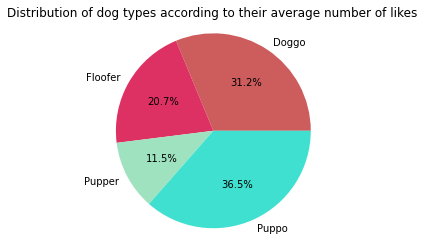

In [681]:
#plotting the result in a pie chart
labels = ['Doggo', 'Floofer','Pupper', 'Puppo']
colors = ['#CD5C5C', '#DE3163', '#9FE2BF', '#40E0D0']
plt.pie(likedogs, labels=labels, autopct='%1.1f%%', colors =colors)
plt.title('Distribution of dog types according to their average number of likes')
plt.axis('equal');

This shows that puppo is the most liked dog type in the twitter's space.

### Which dog type is mostly tweeted about?

In [682]:
#checking the number of times each dog type is tweeted about
tweetdogs = df_dogtypes.dog_types.value_counts()
tweetdogs

pupper     209
doggo       62
puppo       23
floofer      8
Name: dog_types, dtype: int64

### Visualization

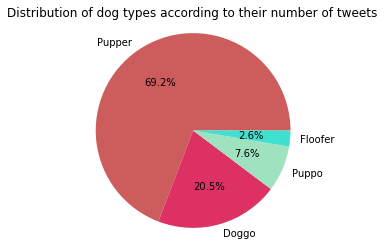

In [683]:
#plotting the result in a pie chart
labels = ['Pupper', 'Doggo','Puppo', 'Floofer']
colors = ['#CD5C5C', '#DE3163', '#9FE2BF', '#40E0D0']
plt.pie(tweetdogs, labels=labels, autopct='%1.1f%%', colors =colors)
plt.title('Distribution of dog types according to their number of tweets')
plt.axis('equal');

Pupper is the type of the dog that received the highest number of tweet. 

### Which dog type has the highest rating?

In [688]:
#grouping the data by dog_types and finding the mean of their rating_numerator
ratingdogs = df_dogtypes.groupby(['dog_types'], as_index=True)['rating_numerator'].mean()
ratingdogs

dog_types
doggo      11.870968
floofer    11.875000
pupper     10.650718
puppo      12.043478
Name: rating_numerator, dtype: float64

### Visualization

Text(0.5, 1.0, 'Dog rating according to their types')

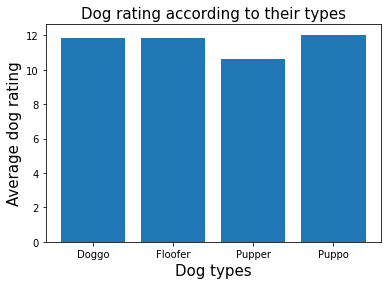

In [689]:
#plotting the results in a bar chart
plt.bar(['Doggo', 'Floofer', 'Pupper', 'Puppo'], ratingdogs)
plt.xlabel('Dog types', fontsize=15)
plt.ylabel('Average dog rating', fontsize=15)
plt.title('Dog rating according to their types', fontsize=15)

Puppo has the highest rating, while pupper has the lowest rating.

### According to the best prediction algorithm, which dog breed received the highest rating?

Since p1 is the best algorithm with the highest confidence, it would contain the highest number of breeds that are correctly predicted.

Remeber there are few outliers in the rating_numerator column. 99% of the data is 14. Therefore, any value beyond 14 would be removed from the analysis. 

In [690]:
ratingbreed_df = clean_df.query('rating_numerator <= 14')

In [691]:
#grouping the data by p1 and finding the mean of their rating_numerator
ratingbreed = ratingbreed_df.groupby(['p1'], as_index=True)['rating_numerator'].mean()
#sorting them in descending order and taking the topest 30 breeds
ratingbreed = ratingbreed.sort_values(ascending=False).nlargest(30)
ratingbreed

p1
pedestal            14.0
military_uniform    14.0
limousine           14.0
pole                14.0
prison              14.0
laptop              14.0
bannister           13.0
padlock             13.0
teapot              13.0
canoe               13.0
marmot              13.0
tiger_shark         13.0
quilt               13.0
restaurant          13.0
cliff               13.0
barbell             13.0
bakery              13.0
upright             13.0
loupe               13.0
syringe             13.0
revolver            13.0
hammer              13.0
grille              13.0
fountain            13.0
convertible         13.0
snowmobile          13.0
dough               13.0
orange              13.0
home_theater        12.6
Saluki              12.5
Name: rating_numerator, dtype: float64

### Visualization

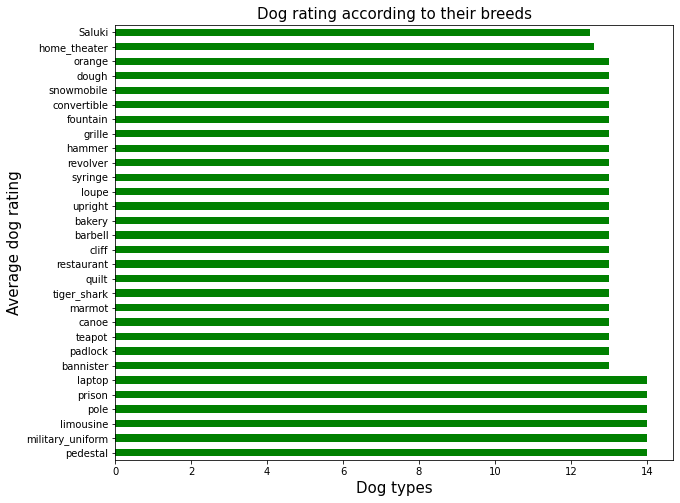

In [692]:
#plotting the result in an horizontal bar chart
plt.figure(figsize=(10,8))
ratingbreed.plot(kind='barh', color='green')
plt.xlabel('Dog types', fontsize=15)
plt.ylabel('Average dog rating', fontsize=15)
plt.title('Dog rating according to their breeds', fontsize=15);

### What is correlation between retweet_count & favorites and rating & favorites?

In [693]:
clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorites,dog_types,name
0,667549055577362432,2015-11-20 03:44:31,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,electric_fan,...,spotlight,0.007737,False,lampshade,0.001901,False,1947,5096,None,None
1,667546741521195010,2015-11-20 03:35:20,Twitter Web Client,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,https://twitter.com/dog_rates/status/667546741521195010/photo/1,9,10,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,...,miniature_poodle,0.202225,True,teddy,0.004047,False,106,303,None,George
2,667544320556335104,2015-11-20 03:25:43,Twitter Web Client,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",https://twitter.com/dog_rates/status/667544320556335104/photo/1,10,10,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,...,Pembroke,0.312958,True,Chihuahua,0.071960,True,458,760,None,Kial
3,667538891197542400,2015-11-20 03:04:08,Twitter Web Client,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,https://twitter.com/dog_rates/status/667538891197542400/photo/1,9,10,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,Yorkshire_terrier,...,silky_terrier,0.300313,True,Australian_terrier,0.053412,True,58,175,None,None
4,667724302356258817,2015-11-20 15:20:54,Twitter Web Client,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,https://twitter.com/dog_rates/status/667724302356258817/photo/1,7,10,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0,ibex,...,bighorn,0.125119,False,ram,0.074673,False,268,424,None,None


In [694]:
clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorites', 'dog_types', 'name'],
      dtype='object')

In [695]:
clean_df1 = clean_df.copy()

In [697]:
#creating a dataframe that consists of the numerical variables: rating_numerator, rating_denominator, 
#p1_conf, p2_conf, p3_conf, retweet_count and favorites

clean_df1 = clean_df1.drop(['timestamp', 'source', 'expanded_urls',
       'name', 'jpg_url', 'img_num',
       'p1', 'p1_dog', 'p2', 'p2_dog', 'p3',
       'p3_dog', 'dog_types'], axis=1)

In [698]:
clean_df1.head()

,tweet_id,text,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorites
0,667549055577362432,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10,0.984377,0.007737,0.001901,1947,5096
1,667546741521195010,Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10 https://t.co/afRtVsoIIb,9,10,0.787424,0.202225,0.004047,106,303
2,667544320556335104,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",10,10,0.412893,0.312958,0.071960,458,760
3,667538891197542400,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,9,10,0.618957,0.300313,0.053412,58,175
4,667724302356258817,What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10 https://t.co/0nIxPTDWAZ,7,10,0.619098,0.125119,0.074673,268,424


In [699]:
# getting the correlation coefficients between rating_numerator, rating_denominator, p1_conf, p2_conf, p3_conf
#retweet_count and favorites
correlation_matrix = clean_df1.corr()
correlation_matrix

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorites
tweet_id,1.000000,0.126727,-0.017183,0.101709,-0.000962,-0.044783,0.386263,0.613520
rating_numerator,0.126727,1.000000,0.960446,0.038292,-0.035183,-0.014100,0.063435,0.081956
rating_denominator,-0.017183,0.960446,1.000000,0.011923,-0.038159,-0.006603,-0.016595,-0.023576
p1_conf,0.101709,0.038292,0.011923,1.000000,-0.511959,-0.707940,0.048537,0.070850
p2_conf,-0.000962,-0.035183,-0.038159,-0.511959,1.000000,0.481945,-0.013814,-0.016084
p3_conf,-0.044783,-0.014100,-0.006603,-0.707940,0.481945,1.000000,-0.038361,-0.046318
retweet_count,0.386263,0.063435,-0.016595,0.048537,-0.013814,-0.038361,1.000000,0.928438
favorites,0.613520,0.081956,-0.023576,0.070850,-0.016084,-0.046318,0.928438,1.000000


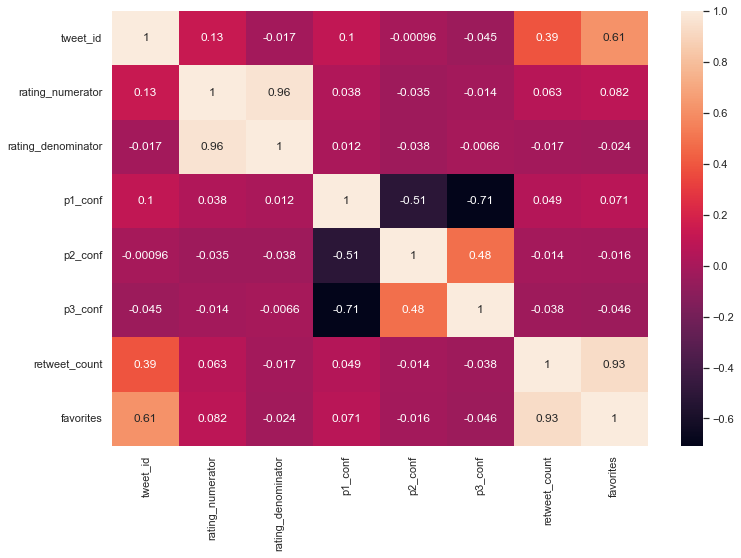

In [702]:
#plotting an heat map for the above result
sns.set(rc={'figure.figsize': (12,8)})
sns.heatmap(correlation_matrix, annot=True)
plt.show()

There is a positive relationship between retweet_counts and favorites. The same trend was found between rating and favorites.